In [1]:
from statsmodels.stats.multitest import multipletests
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

In [2]:
rootPath = "/deseq_analysis/"

In [3]:
filenamesfile = "deseq_results_filenames.txt"

In [4]:
filenameslist = []

In [5]:
with open(filenamesfile, 'r') as f:
    for line in f:
        filenameslist.append(os.path.join(rootPath,
                                          line.strip()))

In [6]:
glia_hpc_sex_0_results_file_suffix = "sex_specific_amyloid_deseq/glia_hpc_sex_0_specific_binary_amyloid_results_sorted.txt"
glia_hpc_sex_0_results_file_name = os.path.join(rootPath,glia_hpc_sex_0_results_file_suffix)

glia_dlpfc_sex_0_results_file_suffix = "sex_specific_amyloid_deseq/glia_dlpfc_sex_0_specific_binary_amyloid_results_sorted.txt"
glia_dlpfc_sex_0_results_file_name = os.path.join(rootPath,glia_dlpfc_sex_0_results_file_suffix)


glia_dlpfc_results_file_suffix = "binary_amyloid_deseq/glia_dlpfc_binary_amyloid_results_sorted.txt"
glia_dlpfc_results_file_name = os.path.join(rootPath,glia_dlpfc_results_file_suffix)

glia_hpc_results_file_suffix = "binary_amyloid_deseq/glia_hpc_binary_amyloid_results_sorted.txt"
glia_hpc_results_file_name = os.path.join(rootPath,glia_hpc_results_file_suffix)

In [7]:
pvaluestable = pd.DataFrame(columns = ["Membership", "pvalue", "peakID"])

In [8]:
for filename in filenameslist:
    data = pd.read_csv(filename, sep='\t')
    pvals = list(data["pvalue"])
    peakIds = list(data.index)
    membership = 0
    if filename == glia_hpc_sex_0_results_file_name:
        membership = 1
    elif filename == glia_dlpfc_results_file_name:
        membership = 2
    num_results = data.shape[0]
    extra = {'Membership': [membership]*num_results, 'pvalue': pvals, 'peakID': peakIds}
    pvaluestable = pvaluestable.append(pd.DataFrame(extra))

In [9]:
final_pvals = list(pvaluestable["pvalue"])

In [10]:
correction_result = multipletests(final_pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)

In [11]:
pvaluestable["padj"] = correction_result[1]

In [12]:
pvaluestable.shape

(13394888, 4)

In [13]:
(pvaluestable.loc[pvaluestable["Membership"]==1]).shape

(24424, 4)

In [14]:
glia_hpc_sex_0_specific_results_pvaluestable = pvaluestable.loc[pvaluestable["Membership"]==1]
glia_dlpfc_results_pvaluestable = pvaluestable.loc[pvaluestable["Membership"]==2]

In [15]:
glia_hpc_sex_0_specific_results_pvaluestable.loc[glia_hpc_sex_0_specific_results_pvaluestable["padj"]<0.05]

,Membership,pvalue,peakID,padj
0,1,4.548183e-11,LHTPFCHPC000000000317596,0.000004
1,1,1.051237e-08,LHTPFCHPC000000000051149,0.000618
2,1,6.970243e-08,LHTPFCHPC000000000311581,0.003144
3,1,4.228722e-07,LHTPFCHPC000000000214719,0.014945
4,1,1.061273e-06,LHTPFCHPC000000000114043,0.029740
5,1,1.120957e-06,LHTPFCHPC000000000339447,0.030959


In [16]:
glia_dlpfc_results_pvaluestable.loc[glia_dlpfc_results_pvaluestable["padj"]<0.05]

,Membership,pvalue,peakID,padj
0,2,2.903506e-85,LHTPFCHPC000000000128659,3.889213e-78
1,2,7.279996e-08,LHTPFCHPC000000000146887,3.272307e-03
2,2,1.425682e-07,LHTPFCHPC000000000212359,5.822210e-03
3,2,1.919526e-06,LHTPFCHPC000000000107851,4.788051e-02
5,2,1.499510e-06,LHTPFCHPC000000000192396,3.909359e-02


In [17]:
glia_hpc_sex_0_specific_binary_amyloid_results = pd.read_csv(glia_hpc_sex_0_results_file_name, sep='\t')
glia_dlpfc_sex_0_specific_binary_amyloid_results = pd.read_csv(glia_dlpfc_sex_0_results_file_name, sep='\t')

In [18]:
glia_hpc_sex_0_specific_binary_amyloid_results.shape

(24424, 6)

In [19]:
glia_dlpfc_sex_0_specific_binary_amyloid_results.shape

(242716, 6)

In [20]:
merged_table_glia_hpc_sex_0 = glia_dlpfc_sex_0_specific_binary_amyloid_results.join(glia_hpc_sex_0_specific_binary_amyloid_results,
                                                      how='inner',
                                                      lsuffix='dlpfc',
                                                      rsuffix='hpc')

In [21]:
merged_table_glia_hpc_sex_0.shape

(24419, 12)

Text(0.5, 1.0, 'log2fc comparison hpc oeg female analysis (all peaks passing ind. criteria DESeq2)')

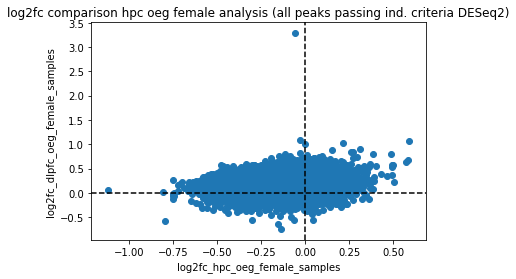

In [22]:
plt.scatter(merged_table_glia_hpc_sex_0["log2FoldChangehpc"], merged_table_glia_hpc_sex_0["log2FoldChangedlpfc"])
plt.axhline(y=0, c='k', linestyle='--')
plt.axvline(x=0, c='k', linestyle='--')
plt.xlabel("log2fc_hpc_oeg_female_samples")
plt.ylabel("log2fc_dlpfc_oeg_female_samples")
plt.title("log2fc comparison hpc oeg female analysis (all peaks passing ind. criteria DESeq2)")

In [23]:
print(pearsonr(merged_table_glia_hpc_sex_0["log2FoldChangehpc"], merged_table_glia_hpc_sex_0["log2FoldChangedlpfc"]))
print(spearmanr(merged_table_glia_hpc_sex_0["log2FoldChangehpc"], merged_table_glia_hpc_sex_0["log2FoldChangedlpfc"]))

(0.06580284499043122, 7.549148031092471e-25)
SpearmanrResult(correlation=0.03470879366479769, pvalue=5.7904518250357045e-08)


In [24]:
merged_table_hpc_sig = merged_table_glia_hpc_sex_0.loc[merged_table_glia_hpc_sex_0["padjhpc"]<0.05]

Text(0.5, 1.0, 'log2fc comparison hpc oeg female analysis (1962 hypoacetylated + 8 hyperacetylated peaks)')

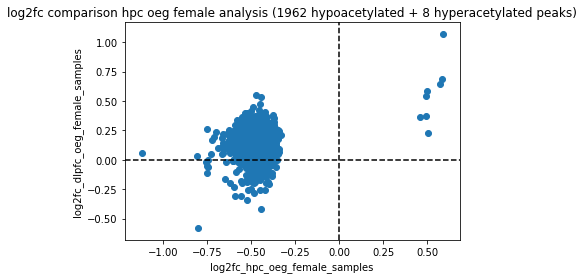

In [25]:
plt.scatter(merged_table_hpc_sig["log2FoldChangehpc"], merged_table_hpc_sig["log2FoldChangedlpfc"])
plt.axhline(y=0, c='k', linestyle='--')
plt.axvline(x=0, c='k', linestyle='--')
plt.xlabel("log2fc_hpc_oeg_female_samples")
plt.ylabel("log2fc_dlpfc_oeg_female_samples")
plt.title("log2fc comparison hpc oeg female analysis (1962 hypoacetylated + 8 hyperacetylated peaks)")

In [26]:
print(pearsonr(merged_table_hpc_sig["log2FoldChangehpc"], merged_table_hpc_sig["log2FoldChangedlpfc"]))
print(spearmanr(merged_table_hpc_sig["log2FoldChangehpc"], merged_table_hpc_sig["log2FoldChangedlpfc"]))

(0.21714458758483704, 1.8755476936349678e-22)
SpearmanrResult(correlation=-0.008845106631796783, pvalue=0.6948027690533944)


In [27]:
glia_dlpfc_binary_amyloid_results = pd.read_csv(glia_dlpfc_results_file_name, sep='\t')
glia_hpc_binary_amyloid_results = pd.read_csv(glia_hpc_results_file_name, sep='\t')

In [28]:
merged_table_dlpfc_all_samples = glia_hpc_binary_amyloid_results.join(glia_dlpfc_binary_amyloid_results,
                                                      how='inner',
                                                      lsuffix='hpc',
                                                      rsuffix='dlpfc')

Text(0.5, 1.0, 'log2fc comparison dlpfc oeg analysis (all peaks passing ind. criteria DESeq2)')

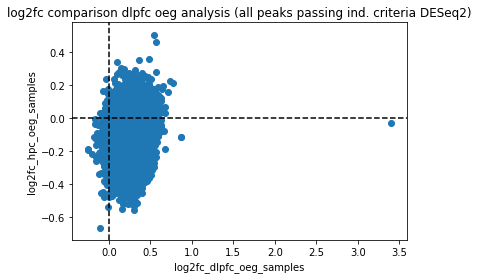

In [29]:
plt.scatter(merged_table_dlpfc_all_samples["log2FoldChangedlpfc"], merged_table_dlpfc_all_samples["log2FoldChangehpc"])
plt.axhline(y=0, c='k', linestyle='--')
plt.axvline(x=0, c='k', linestyle='--')
plt.xlabel("log2fc_dlpfc_oeg_samples")
plt.ylabel("log2fc_hpc_oeg_samples")
plt.title("log2fc comparison dlpfc oeg analysis (all peaks passing ind. criteria DESeq2)")

In [30]:
print(pearsonr(merged_table_dlpfc_all_samples["log2FoldChangehpc"], merged_table_dlpfc_all_samples["log2FoldChangedlpfc"]))
print(spearmanr(merged_table_dlpfc_all_samples["log2FoldChangehpc"], merged_table_dlpfc_all_samples["log2FoldChangedlpfc"]))

(0.05625749338686317, 8.080838113206806e-14)
SpearmanrResult(correlation=0.04648684487852295, pvalue=6.818222437941313e-10)


In [31]:
merged_table_dlpfc_all_samples_dlpfc_sig = merged_table_dlpfc_all_samples.loc[merged_table_dlpfc_all_samples["padjdlpfc"]<0.05]

Text(0.5, 1.0, 'log2fc comparison dlpfc oeg analysis (1029 hyperacetylated peaks)')

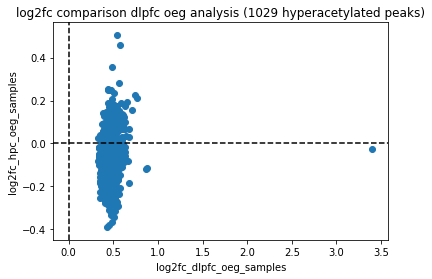

In [32]:
plt.scatter(merged_table_dlpfc_all_samples_dlpfc_sig["log2FoldChangedlpfc"], merged_table_dlpfc_all_samples_dlpfc_sig["log2FoldChangehpc"])
plt.axhline(y=0, c='k', linestyle='--')
plt.axvline(x=0, c='k', linestyle='--')
plt.xlabel("log2fc_dlpfc_oeg_samples")
plt.ylabel("log2fc_hpc_oeg_samples")
plt.title("log2fc comparison dlpfc oeg analysis (1029 hyperacetylated peaks)")

In [33]:
print(pearsonr(merged_table_dlpfc_all_samples_dlpfc_sig["log2FoldChangehpc"], merged_table_dlpfc_all_samples_dlpfc_sig["log2FoldChangedlpfc"]))
print(spearmanr(merged_table_dlpfc_all_samples_dlpfc_sig["log2FoldChangehpc"], merged_table_dlpfc_all_samples_dlpfc_sig["log2FoldChangedlpfc"]))

(0.11432169476094842, 0.00023802514775202662)
SpearmanrResult(correlation=0.12739520326606385, pvalue=4.161428817625757e-05)


In [34]:
glia_hpc_sex_0_specific_results_homer_annot = pd.read_csv("/deseq_analysis/sex_specific_amyloid_deseq/glia_hpc_sex_0_specific_binary_amyloid_down_homer_gene_annot.txt", sep='\t')

In [41]:
ad_genes_list = ["ADAM10",
                 "BIN1",
                 "ADAMTS4",
                 "PICALM",
                 "FERMT2",
                 "SORL1",
                 "BACE1",
                 "CLU",
                 "PTK2B",
                 "MAPT",
                 "APP",
                 "PSEN1",
                 "PSEN2"]

In [43]:
glia_hpc_sex_0_specific_results_homer_annot_ad_genes = glia_hpc_sex_0_specific_results_homer_annot.loc[glia_hpc_sex_0_specific_results_homer_annot["Gene Name"].isin(ad_genes_list)]

In [64]:
merged_glia_hpc_data = pd.merge(glia_hpc_sex_0_specific_results_homer_annot_ad_genes,
         glia_hpc_sex_0_specific_results_pvaluestable,
         left_on="PeakID (cmd=annotatePeaks.pl glia_hpc_sex_0_specific_binary_amyloid_down_homer_input.bed hg19)",
         right_on="peakID",
         )

In [66]:
merged_glia_hpc_data[["peakID", "Gene Name", "padj"]]

,peakID,Gene Name,padj
0,LHTPFCHPC000000000064073,BACE1,0.940886
1,LHTPFCHPC000000000180082,BIN1,0.502990
2,LHTPFCHPC000000000204603,APP,1.000000
3,LHTPFCHPC000000000028900,PSEN2,1.000000
4,LHTPFCHPC000000000060756,PICALM,1.000000
5,LHTPFCHPC000000000098597,FERMT2,1.000000
6,LHTPFCHPC000000000180095,BIN1,0.910840
7,LHTPFCHPC000000000111590,ADAM10,1.000000
8,LHTPFCHPC000000000101505,PSEN1,1.000000
9,LHTPFCHPC000000000065128,SORL1,1.000000


In [55]:
glia_dlpfc_specific_results_homer_annot = pd.read_csv("/deseq_analysis/binary_amyloid_deseq/glia_dlpfc_binary_amyloid_up_homer_gene_annot.txt", sep='\t', header=None)

In [57]:
glia_dlpfc_specific_results_homer_annot_ad_genes = glia_dlpfc_specific_results_homer_annot.loc[glia_dlpfc_specific_results_homer_annot[15].isin(ad_genes_list)]

In [71]:
merged_glia_dlpfc_data = pd.merge(glia_dlpfc_specific_results_homer_annot_ad_genes,
         glia_dlpfc_results_pvaluestable,
         left_on=0,
         right_on="peakID",
         )

In [76]:
merged_glia_dlpfc_data[["peakID", 15, "padj"]]

,peakID,15,padj
0,LHTPFCHPC000000000028896,PSEN2,1.0
1,LHTPFCHPC000000000020638,ADAMTS4,1.0
2,LHTPFCHPC000000000065055,SORL1,1.0
3,LHTPFCHPC000000000180101,BIN1,1.0
4,LHTPFCHPC000000000317699,CLU,1.0
5,LHTPFCHPC000000000028895,PSEN2,1.0
